<a href="https://colab.research.google.com/github/ManjunathD620/Machine-Learning/blob/main/HandWritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
(trainX, trainY), (testX, testY) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(trainY[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


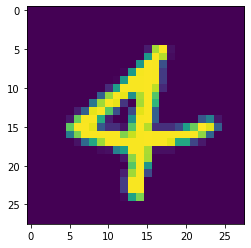

In [20]:
pyplot.imshow(trainX[150].reshape(28,28))

In [4]:
trainX = trainX.astype("float32")
testX = testX.astype("float32")
trainX = trainX/255.0
testX = testX/255.0

In [5]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)
print(trainX.shape,testX.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print(trainY[0:20])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
model.fit(trainX, trainY ,batch_size=100 ,epochs = 10 ,verbose=1,validation_data=(testX, testY))

Epoch 1/10
600/600 [==============================] - 24s 38ms/step - loss: 0.5670 - accuracy: 0.8261 - val_loss: 0.1361 - val_accuracy: 0.9602
Epoch 2/10
600/600 [==============================] - 23s 38ms/step - loss: 0.1239 - accuracy: 0.9613 - val_loss: 0.0928 - val_accuracy: 0.9715
Epoch 3/10
600/600 [==============================] - 23s 38ms/step - loss: 0.0903 - accuracy: 0.9715 - val_loss: 0.0777 - val_accuracy: 0.9760
Epoch 4/10
600/600 [==============================] - 23s 38ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.0646 - val_accuracy: 0.9798
Epoch 5/10
600/600 [==============================] - 23s 38ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 6/10
600/600 [==============================] - 23s 38ms/step - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.0510 - val_accuracy: 0.9844
Epoch 7/10
600/600 [==============================] - 23s 38ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0496 - val_accuracy:

In [10]:
result = model.evaluate(testX, testY, batch_size=100)

100/100 [==============================] - 1s 13ms/step - loss: 0.0489 - accuracy: 0.9855


predicted value is 2


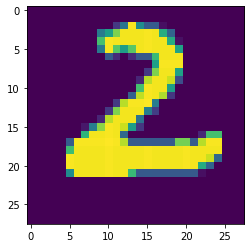

In [24]:
import random
pixels = testX[random.randint(0,len(testX)-1)]
pixels = np.expand_dims(pixels, axis=0)
pyplot.imshow(pixels.reshape(28,28))
prediction = model.predict(pixels)
index = np.argmax(prediction[0])
print("predicted value is "+str(index))